<a href="https://colab.research.google.com/github/Jinyu-Luo/CHL5230/blob/main/3_CHL5230_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title

## Introduction

In [ ]:
# Import necessary libraries
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
# !pip install matplotlib seaborn
import seaborn as sns

from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# upload the data
from google.colab import files
uploaded = files.upload()

Saving CHL5230-F23-Datathon #1-Dataset1.csv to CHL5230-F23-Datathon #1-Dataset1.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon #1-Dataset1.csv']))
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


The dataset consists of 23,535 observations with 10 pieces of information for each observation.

In [ ]:
# Get the shape of the dataframe
print(df.shape)

(23535, 10)


In [ ]:
# List the columns of the dataframe
print(df.columns)

Index(['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI'],
      dtype='object')


#### Descriptive Statistics
Gain some insights into the statistical properties of the dataset.

In [ ]:
# Display summary statistics
print(df.describe())

                Age        Gender  Calorie_Intake  Sugar_Intake  \
count  23535.000000  23535.000000    23535.000000  23535.000000   
mean      48.532993      0.367070     2495.845634     64.824559   
std       17.872736      0.482016      577.798752     32.004657   
min       18.000000      0.000000     1500.000000     10.000000   
25%       33.000000      0.000000     1991.000000     37.000000   
50%       48.000000      0.000000     2495.000000     65.000000   
75%       64.000000      1.000000     2994.000000     93.000000   
max       79.000000      1.000000     3499.000000    119.000000   

       Physical_Activity  Fast_Food_Frequency   Screen_Time        Height  \
count       23535.000000         23535.000000  23535.000000  23535.000000   
mean           89.496707             2.018441      5.486127      1.650279   
std            52.120810             1.414634      3.454036      0.119714   
min             0.000000             0.000000      0.000000      1.196086   
25%        

#### Check Missing Values
As displayed below, there is no missing value in our dataset.

In [ ]:
print(df.isnull().sum())

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
dtype: int64


### Preprocess the Data

First, encode the categorical data. As observed above, "Gender" is the only categorical column, which comprises only two categories: Male and Female. Thus, we will encode the "Gender" column by assigning 0 to Male and 1 to Female.

In [ ]:
# Check categories in Gender column
print("\nUnique values from the Gender colum:\n", df['Gender'].unique())


Unique values from the Gender colum:
 ['Female' 'Male']


In [ ]:
# Preprocess the data
# Encoding 'Gender' column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male: 1, Female: 0

In [ ]:
# Add 'weight_status' column based on BMI
def assess_weight_status(bmi):
  if bmi < 18.5:
    return 'Underweight'
  elif 18.5 <= bmi < 25:
    return 'Normal weight'
  elif 25 <= bmi < 30:
    return 'Overweight'
  else:
    return 'Obesity'

df['weight_status'] = df['BMI'].apply(assess_weight_status)

Below, by checking the uniqueness of entries, we found that data in `Fast_Food_Frequency` and `Screen_Time` are discrete.

In [ ]:
import numpy as np
# Check categories in fast food frequency
sorted_freq = np.sort(df['Fast_Food_Frequency'].unique())
print("\nUnique values from the Fast_Food_Freqency colum:\n", sorted_freq)


Unique values from the Fast_Food_Freqency colum:
 [0 1 2 3 4]


In [ ]:
# Check categories in screen time
sorted_screen_time = np.sort(df['Screen_Time'].unique())
print("\nUnique values from the Screen_Time colum:\n", sorted_screen_time)


Unique values from the Screen_Time colum:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]


## Data Engineering Process

In [ ]:
# split the data into features and label
X = df[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
        'Fast_Food_Frequency', 'Screen_Time']]
Y = df['weight_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,
                                                    random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

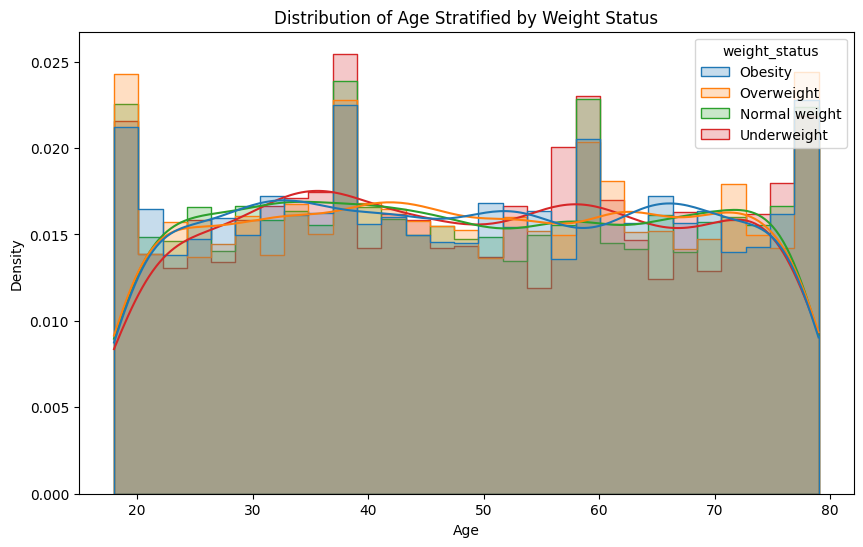

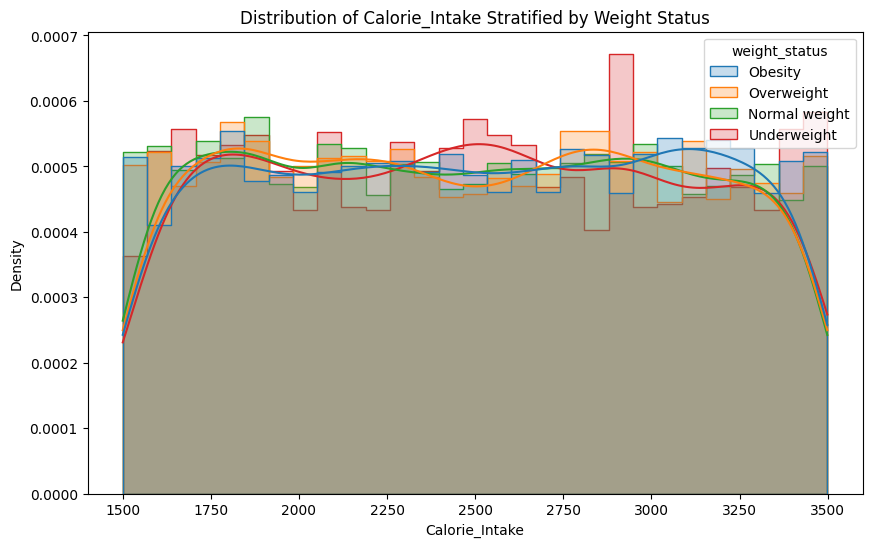

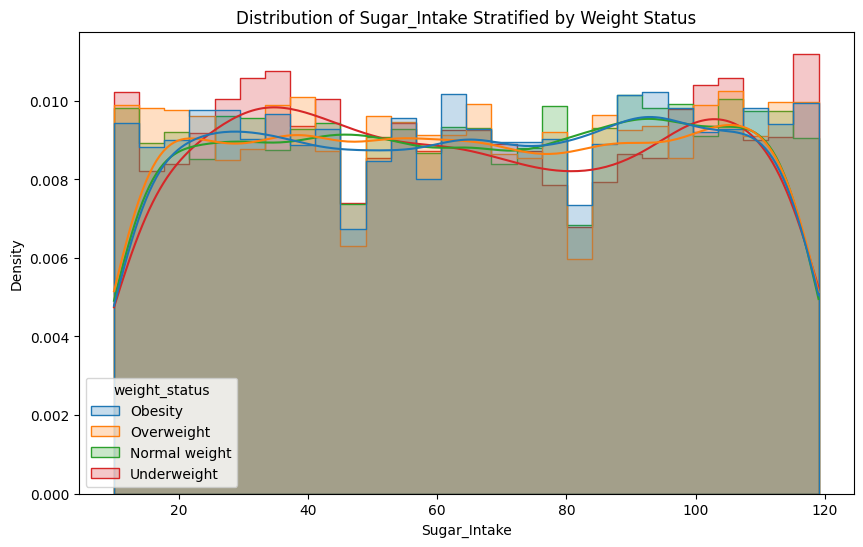

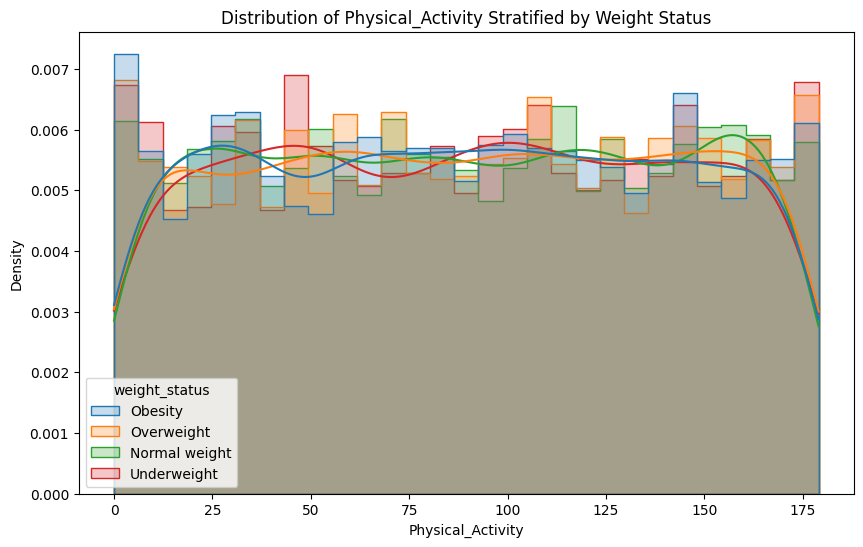

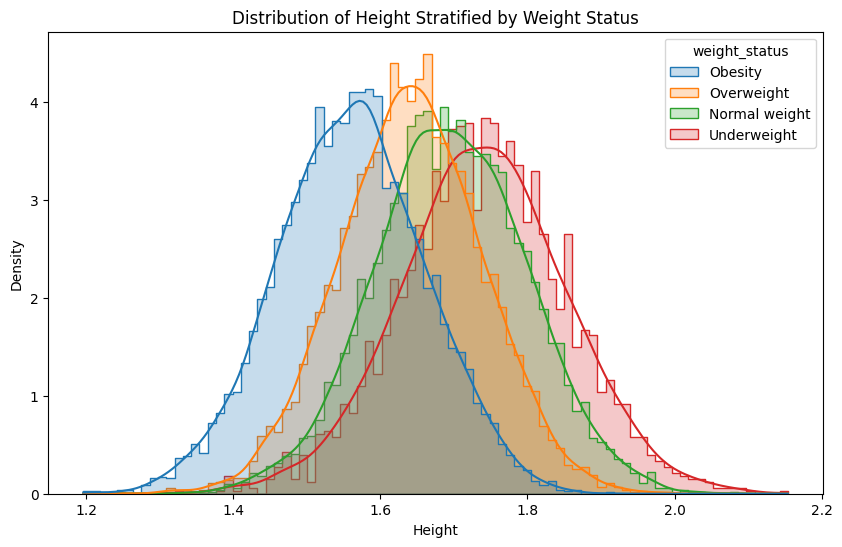

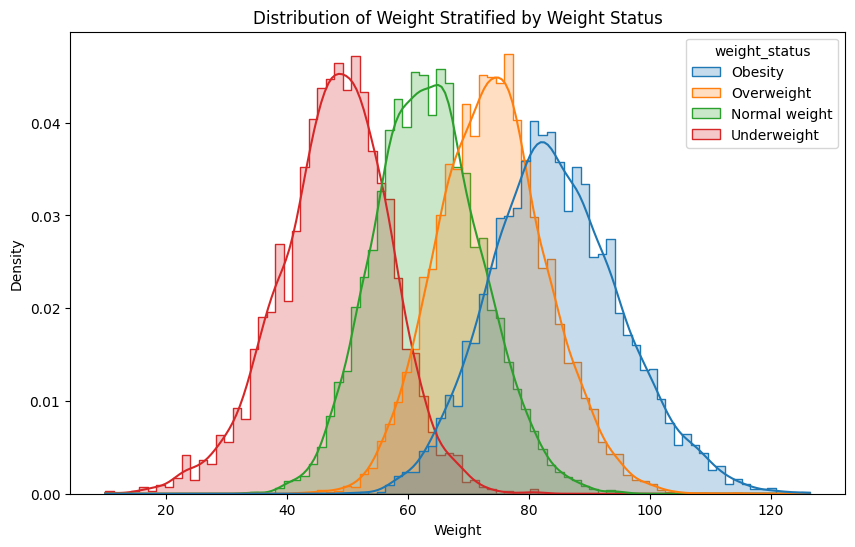

In [ ]:
# Visualize distributions
# List of numerical features (excluding BMI since it directly corresponds to weight_status)
numerical_features = ['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Height', 'Weight']

# Plotting distributions
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='weight_status', element='step',
                 stat='density', common_norm=False, kde=True)
    plt.title(f'Distribution of {feature} Stratified by Weight Status')
    plt.show()

In [ ]:
# Apply KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Setting K to 5 as an example
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[889 346 264  63]
 [705 289 199  51]
 [722 297 227  42]
 [335 135 122  21]]
               precision    recall  f1-score   support

Normal weight       0.34      0.57      0.42      1562
      Obesity       0.27      0.23      0.25      1244
   Overweight       0.28      0.18      0.22      1288
  Underweight       0.12      0.03      0.05       613

     accuracy                           0.30      4707
    macro avg       0.25      0.25      0.24      4707
 weighted avg       0.27      0.30      0.27      4707



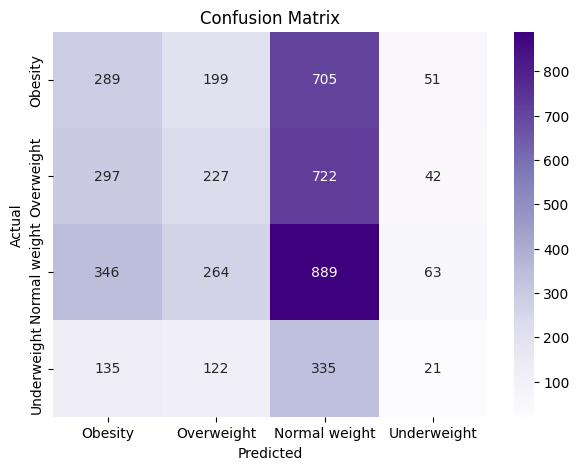

In [ ]:
# Visualize the KNN results using a confusion matrix heatmap

# Get unique classes
classes = df['weight_status'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples',
            annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Analysis

## Findings

## Conclusion

## Individual Contributions

## Code and Presentation